<a href="https://colab.research.google.com/github/kumaramardeep342/Colab-Work/blob/main/Ed_AI__Twitter_US_Airline_Sentiment_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In ClassProject



# Summary - Twitter US Airline Sentiment Analysis
1. Import libraries
2. Read the dataset
3. Merge Train & Test Dataset -- required b/z in prediction error will be come due to column mistmatch post vectorization.
3. Data Preprocessing on  merged dataset - [Data Cleaning] [ TFIDFVectorizer] [label encoding]
4. Split the dataset into X_data and Y_data
5. Split the data into training and testing - 73% training and 27% testing
6. Use only 73% training data to train the model [MultinominalNB]
7. Pass the test to the trained model to predict y_pred_test - validation metrics

# About The Dataset & Model
The dataset has been taken from Kaggle. (https://www.kaggle.com/crowdflower/twitter-airline-sentiment/home)

This is a dataset having tweets about 6 US Airlines along with their sentiments: positive, negative and neutral.

You are provided with two files: ‘Tweets-train.csv” and ‘Tweets-test.csv”The train data contains about 11000 tweets and test contains 4000 tweets. You have to perform Sentiment Analysis on the dataset and also built a classifier on the training data.

Following are the operations to be carried out:


As the original source says,

    A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to
    first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

# Import libraries

In [153]:
#Mount the Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

#enable table format
from google.colab import data_table
data_table.enable_dataframe_formatter()

#disable table format
# from google.colab import data_table
# data_table.disable_dataframe_formatter()

import pandas as pd  # for reading the dataset
import numpy as np  # for mathematical operations
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns  # for plotting
import re
import string
!pip install emoji
import emoji  # for handling emojis
from collections import Counter  # for counting the frequency
from sklearn.preprocessing import LabelEncoder  # for label encoding
from sklearn.feature_extraction.text import TfidfVectorizer  # for TF-IDF vectorization
from sklearn.model_selection import train_test_split  # for splitting the data
from sklearn.naive_bayes import MultinomialNB #naive bayes classifciation
from sklearn.svm import SVC #support vector machine
from sklearn.metrics import confusion_matrix as cm,accuracy_score #model accuracy

import nltk  # for natural language processing
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords  # for stopwords

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Read the dataset
Read the training using pandas moduleand select only the sentiment and text columns

In [154]:
train = pd.read_csv('/content/drive/MyDrive/Colab Work/Edureka AI Certification/Dataset/Kaggle - Twitter US Airline Sentiment/Tweets-train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Work/Edureka AI Certification/Dataset/Kaggle - Twitter US Airline Sentiment/Tweets-test.csv')

In [155]:
train.head(1)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)


In [156]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10640 entries, 0 to 10639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      10640 non-null  int64  
 1   airline_sentiment             10640 non-null  object 
 2   airline_sentiment_confidence  10640 non-null  float64
 3   negativereason                6670 non-null   object 
 4   negativereason_confidence     7672 non-null   float64
 5   airline                       10640 non-null  object 
 6   airline_sentiment_gold        31 non-null     object 
 7   name                          10640 non-null  object 
 8   negativereason_gold           26 non-null     object 
 9   retweet_count                 10640 non-null  int64  
 10  text                          10640 non-null  object 
 11  tweet_coord                   760 non-null    object 
 12  tweet_created                 10640 non-null  object 
 13  t

In [157]:
test.head(1)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570031758546063361,negative,1.0,Customer Service Issue,1.0,American,NaN,msofka,NaN,0,@AmericanAir why did you drop my call. Why don...,NaN,2015-02-23 17:25:36 -0800,"Cleveland, OH",Central Time (US & Canada)


In [158]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      4000 non-null   int64  
 1   airline_sentiment             4000 non-null   object 
 2   airline_sentiment_confidence  4000 non-null   float64
 3   negativereason                2508 non-null   object 
 4   negativereason_confidence     2850 non-null   float64
 5   airline                       4000 non-null   object 
 6   airline_sentiment_gold        9 non-null      object 
 7   name                          4000 non-null   object 
 8   negativereason_gold           6 non-null      object 
 9   retweet_count                 4000 non-null   int64  
 10  text                          4000 non-null   object 
 11  tweet_coord                   259 non-null    object 
 12  tweet_created                 4000 non-null   object 
 13  twe

In [159]:
# Merge Train & Test Dataset
data = pd.concat([train,test])
data.head(1)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)


In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14640 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  tweet_l

<ipython-input-161-771c0cd6a0d2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="airline_sentiment", data=data,palette="Set2")


<Axes: xlabel='airline_sentiment', ylabel='count'>

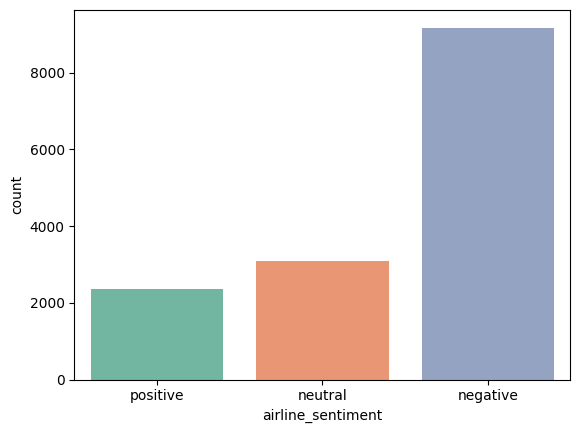

In [161]:
# Unique values of sentiment plot
sns.countplot(x="airline_sentiment", data=data,palette="Set2")
# sns.countplot(x="airline_sentiment", data=train)

In [162]:
# sns.countplot(x="airline_sentiment", data=test)

<ipython-input-163-edc2dc17a685>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="airline", data=data,palette="Set2")


<Axes: xlabel='airline', ylabel='count'>

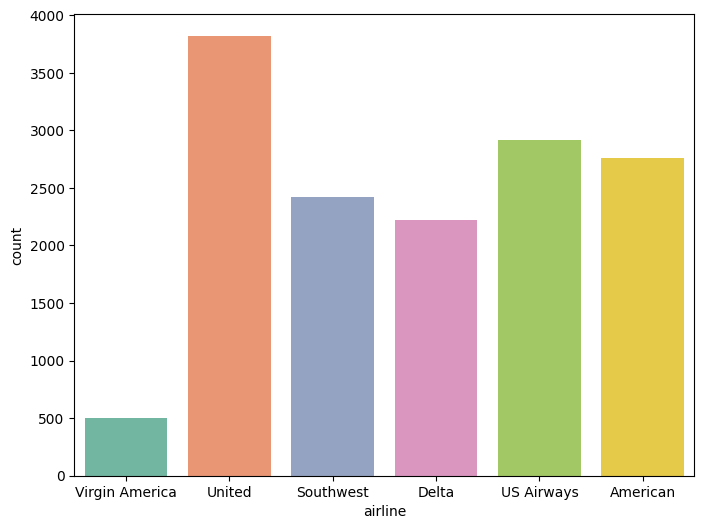

In [163]:
# Unique values of airline
plt.figure(figsize=(8,6))
sns.countplot(x="airline", data=data,palette="Set2")
# sns.countplot(x="airline", data=train)

In [164]:
# sns.countplot(x="airline", data=test)

In [165]:
# train = train[['airline_sentiment','text']]
# test = test[['airline_sentiment','text']]
data = data[['airline_sentiment','text']]

In [166]:
#train.head(2)
data.head(2)

,airline_sentiment,text
0,positive,@VirginAmerica plus you've added commercials t...
1,neutral,@VirginAmerica I didn't today... Must mean I n...


In [167]:
#test.head(2)

# Data Preprocessing

## Data Cleaning

In [168]:
# Observe randomly generated 10 tweets for each sentimentwith respect to the following:
#  Text contains references with ‘@’
#  Text contains links (http , https )
#  Text contains punctuations
#  Text contains Emoticons

# train & test dataset. -- merged dataset

# Text contains references with ‘@’
print('\n\nText contains references with ‘@’:\n')
val_count = 0
#for tweet in train["text"]:
for tweet in data["text"]:
  # Find all tags starting with '@'
  tags = re.findall(r"@\w+", tweet)
  if tags: # Check if links were found
   print(tweet)
   val_count += len(tags)
  if val_count >= 10:
    break  # Stop when 10 or more links are found

# Text contains links (http , https )
print('\n\nText contains links (http , https ):\n')
link_count = 0
#for tweet in train["text"]:
for tweet in data["text"]:
  # Find all links (http and https)
  links = re.findall(r"http\S+|https\S+", tweet)
  if links: # Check if links were found
    print(tweet)
    link_count += len(links)  # Increment link coun
  if link_count >= 10:
    break  # Stop when 10 or more links are found


# Text contains punctuations
print('\n\nText contains punctuations:\n')
punc_count = 0
#for tweet in train["text"]:
for tweet in data["text"]:
  # Find all punctuations
  punc = re.findall(r"[^\w\s]", tweet)
  if punc: # Check if punctuations were found
    print(tweet)
    punc_count += len(punc)  # Increment punctuation count
  if punc_count >= 10:
    break  # Stop when 10 or more punctuations are found

# Text contains Emoticons
sent_count =0
print('\n\nText contains Emoticons:\n')
#for tweet in train["text"]:
for tweet in data["text"]:
    # check  all emoji
  emojis_found = emoji.distinct_emoji_list(tweet)
  if emojis_found:
    print(tweet)
    sent_count += len(emojis_found)
  if sent_count >= 10:
    break  # Stop when 10 or more emojis are found



Text contains references with ‘@’:

@VirginAmerica plus you've added commercials to the experience... tacky.
@VirginAmerica I didn't today... Must mean I need to take another trip!
@VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
@VirginAmerica and it's a really big bad thing about it
@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)
@virginamerica Well, I didn't…but NOW I DO! :-D
@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.
@VirginAmerica did you know that suicide is the second leading cause of death among teens 10-24
@VirginAmerica I &lt;3 pretty graphics. so much better than minimal iconography. :D
@VirginAmerica This is such a great deal! Already thinking about my 2nd trip to @Australia &amp; I haven't even gone on my 1st trip yet! ;p


Text contains links (http , https ):

@VirginAmerica @virginmedia I'm flying your #fabulous #Seductive 

In [169]:
# You have to prepare a function to clean all the above observed tokens from the tweet text.Save changes in a new column

def refine(tweet):
  if not isinstance(tweet, str): # Check if tweet is a string
    return tweet # If not a string, return the original value

  #cleaned_tweet = ""

  # Find all tags starting with '@'
  tags = re.findall(r"@\w+", tweet)
  for word in tweet.split():
    if tags: # Check if tags were found
      for tag in tags:
            tweet = tweet.replace(tag, '')
  #       if word not in tags:
  #           cleaned_tweet += word + " "
  #tweet = cleaned_tweet

  # Find all links (http and https)
  links = re.findall(r"http\S+|https\S+", tweet)
  for word in tweet.split():
    if links: # Check if links were found
      for link in links:
            tweet = tweet.replace(link, '')
  #       if word not in links:
  #           cleaned_tweet += word + " "
  # tweet = cleaned_tweet

  # Find all punctuations
  punc = re.findall(r"[^\w\s]", tweet)
  for word in tweet.split():
    if punc: # Check if punctuations were found
      for p in punc:
            tweet = tweet.replace(p, '')
  #       if word not in punc:
  #           cleaned_tweet += word + " "
  # tweet = cleaned_tweet

  # check  all emoji
  emojis_found = emoji.distinct_emoji_list(tweet)
  for word in tweet.split():
    if emojis_found: # Check if emojis were found
      for emoji_found in emojis_found:
            tweet = tweet.replace(emoji_found, '')
  #       if word not in emojis_found:
  #           cleaned_tweet += word + " "
  # tweet = cleaned_tweet

  return tweet

# Create the 'text_1' column in both DataFrames before modifying values
# train['text_1'] = ''  # Initialize the new column in 'train'
# test['text_1'] = ''   # Initialize the new column in 'test'
#data['text_1'] = ''   # Initialize the new column in 'data'

# Apply the 'refine' function to the 'text' column in both DataFrames
# for i in range (len(train)):
#   train['text_1'][i] = refine(train['text'][i])

# for i in range (len(test)):
#   test['text_1'][i] = refine(test['text'][i])

# for i in range (len(data)):
#   data['text_1'][i] = refine(data['text'][i])
data['text_1'] = data['text'].apply(refine) # Apply the 'refine' function to the 'text' column and store the result in 'text_1'

In [170]:
#train.head(1)
data.head(1)

,airline_sentiment,text,text_1
0,positive,@VirginAmerica plus you've added commercials t...,plus youve added commercials to the experienc...


In [171]:
#test.head(1)

In [172]:
# List down the most common 15 words for each sentiment. Observe the results

def get_most_common_words(df, sentiment ,num_words=15):
  #Filter the DataFrame for the given sentiment
  sentiment_df = df[df['airline_sentiment'] == sentiment]

  #Tokenize the  text and count word frequencies
  all_words=[]
  for text in sentiment_df['text_1']:
    words = nltk.word_tokenize(text)
    all_words.extend(words)
  word_counts = Counter(all_words)
  # Extract just the words (keys of the Counter dictionary)
  most_common_words = [word for word, _ in word_counts.most_common(num_words)]
  #return word_counts.most_common(num_words)   #Get the most common words
  return most_common_words


In [173]:
# positive_words = get_most_common_words(train, 'positive')
# negative_words = get_most_common_words(train, 'negative')
# neutral_words = get_most_common_words(train, 'neutral')

positive_words = get_most_common_words(data, 'positive')
negative_words = get_most_common_words(data, 'negative')
neutral_words = get_most_common_words(data, 'neutral')

print("Most common positive words:", positive_words)
print("Most common negative words:", negative_words)
print("Most common neutral words:", neutral_words)

Most common positive words: ['to', 'the', 'you', 'for', 'I', 'a', 'and', 'on', 'flight', 'my', 'thanks', 'in', 'Thanks', 'of', 'me']
Most common negative words: ['to', 'the', 'I', 'a', 'and', 'on', 'for', 'flight', 'you', 'my', 'is', 'in', 'of', 'me', 'not']
Most common neutral words: ['to', 'I', 'the', 'a', 'you', 'on', 'for', 'flight', 'my', 'in', 'and', 'is', 'of', 'from', 'can']


In [174]:
# positive_words = get_most_common_words(test, 'positive')
# negative_words = get_most_common_words(test, 'negative')
# neutral_words = get_most_common_words(test, 'neutral')

# print("Most common positive words:", positive_words)
# print("Most common negative words:", negative_words)
# print("Most common neutral words:", neutral_words)

In [175]:
#Remove Stopwords from all the tweets.Save changes in a new column and list down most common 15 words.
def   remove_stopwords_and_get_common(df, column_name,num_words=15):
  stop_words = set(stopwords.words("english"))

  def cleaned_tweet(tweet):
    word = nltk.word_tokenize(tweet)
    cleaned_tweet = [w for w in word if w.lower() not in stop_words]
    return " ".join(cleaned_tweet)

  # Apply the cleaning function to create a new column
  df[column_name] = df['text_1'].apply(cleaned_tweet)

  # Count word frequencies in the cleaned tweets
  all_words = []
  for text in df[column_name]:
    words = nltk.word_tokenize(text)
    all_words.extend(words)
  word_counts = Counter(all_words)

  # Extract just the words (keys of the Counter dictionary)
  most_common_words = [word for word, _ in word_counts.most_common(num_words)]
  return most_common_words




In [176]:
# Create a new column 'cleaned_text' to store tweets without stopwords
# common_words = remove_stopwords_and_get_common(train, 'text_2')
common_words = remove_stopwords_and_get_common(data, 'text_2')
print("Most common words after removing stopwords:", common_words)

Most common words after removing stopwords: ['flight', 'get', 'Cancelled', 'service', 'time', 'Flight', 'help', 'Im', 'customer', 'hours', '2', 'amp', 'hold', 'flights', 'plane']


In [177]:
#train.head(1)
data.head(1)

,airline_sentiment,text,text_1,text_2
0,positive,@VirginAmerica plus you've added commercials t...,plus youve added commercials to the experienc...,plus youve added commercials experience tacky


In [178]:
# Create a new column 'cleaned_text' to store tweets without stopwords
# common_words = remove_stopwords_and_get_common(test, 'text_2')
# print("Most common words after removing stopwords:", common_words)

In [179]:
# test.head(1)

In [180]:
#Remove these words from all the tweets.
#americanair,united,delta,southwestair,jetblue,virginamerica,usairways,flight,plane
#Save changes in a new column and list down most common 15 words.Comment your observations
def remove_given_words(df, column_name, remove_words,num_words=15):

    def cleaned_tweet(tweet):
      word = nltk.word_tokenize(tweet)
      cleaned_tweet = [w for w in word if w.lower() not in remove_words]
      return " ".join(cleaned_tweet)

    # Apply the cleaning function to create a new column
    df[column_name] = df['text_2'].apply(cleaned_tweet)

    # Count word frequencies in the cleaned tweets
    all_words = []
    for text in df[column_name]:
      words = nltk.word_tokenize(text)
      all_words.extend(words)
    word_counts = Counter(all_words)

    # Extract just the words (keys of the Counter dictionary)
    most_common_words = [word for word, _ in word_counts.most_common(num_words)]
    return most_common_words



In [181]:
remove_words = ['americanair', 'united', 'delta', 'southwestair', 'jetblue', 'virginamerica', 'usairways', 'flight', 'plane']
#common_words= remove_given_words(train, 'text_3', remove_words)
common_words= remove_given_words(data, 'text_3', remove_words)
print("Most common words after removing stopwords:", common_words)

Most common words after removing stopwords: ['get', 'Cancelled', 'service', 'time', 'help', 'Im', 'customer', 'hours', '2', 'amp', 'hold', 'flights', 'thanks', 'Thanks', 'us']


In [182]:
# train.head(1)
data.head(1)

,airline_sentiment,text,text_1,text_2,text_3
0,positive,@VirginAmerica plus you've added commercials t...,plus youve added commercials to the experienc...,plus youve added commercials experience tacky,plus youve added commercials experience tacky


In [183]:
# remove_words = ['americanair', 'united', 'delta', 'southwestair', 'jetblue', 'virginamerica', 'usairways', 'flight', 'plane']
# common_words= remove_given_words(test, 'text_3', remove_words)
# print("Most common words after removing stopwords:", common_words)

In [184]:
# test.head(1)

In [185]:
# train = train[['airline_sentiment','text_3']]
# test = test[['airline_sentiment','text_3']]
data = data[['airline_sentiment','text_3']]

In [186]:
# train = train.rename(columns={'text_3': 'text'})
# test = test.rename(columns={'text_3': 'text'})
data = data.rename(columns={'text_3': 'text'})

In [187]:
# train.head(1)
data.head(1)

,airline_sentiment,text
0,positive,plus youve added commercials experience tacky


In [188]:
# test.head(1)

## Label Encoding

In [189]:
#Encode Sentiments using Label Encoder
encoder = LabelEncoder()
# train['airline_sentiment'] = encoder.fit_transform(train['airline_sentiment'])
# test['airline_sentiment'] = encoder.fit_transform(test['airline_sentiment'])
data['airline_sentiment'] = encoder.fit_transform(data['airline_sentiment'])

In [190]:
#train.head(1)
data.head(1)

,airline_sentiment,text
0,2,plus youve added commercials experience tacky


In [191]:
#test.head()

## Vectorization - TF-IDF

In [192]:
### TF-IDF Vectorizer
def vectorization(df):
  vectorize_tfidf=TfidfVectorizer(ngram_range =(1,1),
                                #stop_words="english",   ##stopwords considered as english
                                max_df=0.98, #remove a word which repeated 98% in the documents
                                min_df=1, # remove a word no repeation
                                max_features=None)
  vectorize_tfidf.fit(df['text'])
  X_tfidf=vectorize_tfidf.transform(df['text'])
  cols = vectorize_tfidf.get_feature_names_out()
  return X_tfidf,cols

In [193]:
# X_train_tfidf ,cols= vectorization(train)
#X_train_tfidf.shape
#X_train_tfidf.toarray()

X_tfidf ,cols= vectorization(data)
X_tfidf.shape
#X_tfidf.toarray()

(14640, 14518)

In [194]:
# train_tf_idf = pd.DataFrame(X_train_tfidf.toarray(),columns=cols)
# train_tf_idf.head(2)

X_data = pd.DataFrame(X_tfidf.toarray(),columns=cols)
X_data.head(2)

,0011,0016,006,0162389030167,0162424965446,0162431184663,0167560070877,0214,021mbps,022015,...,zip,zippers,zombie,zone,zones,zoom,zrh,zukes,zurich,zurichnew
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [195]:
#X_test_tfidf ,cols= vectorization(test)
#X_test_tfidf.shape
#X_test_tfidf.toarray()

In [196]:
# test_tf_idf = pd.DataFrame(X_test_tfidf.toarray(),columns=cols)
# test_tf_idf.head(2)

# Model

In [197]:
#Split the dataset into X_data and Y_data
#Split the data into training and testing - 73% training and 27% testing
Y_data = data['airline_sentiment']
X_train ,X_test ,Y_train ,Y_test = train_test_split(X_data,Y_data,test_size=0.27,random_state=42)

## Design - Naive Bayes [MultinomialNB]

In [198]:
#Prepare a multiclass Classification model using any classification algorithmand create a model
#Predict the sentiments for test data
mnb = MultinomialNB()
mnb.fit(X_train,Y_train)
y_pred_test=mnb.predict(X_test)
y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

### Confusion Matrix & Accuracy

In [199]:
 # Confusion Matrix
 def cm1(y_true, y_pred):
    matrix = cm(y_true, y_pred)
    print("Confusion Matrix:")
    print(matrix)
    # tn, fp, fn, tp = cm(y_true, y_pred).ravel()
    accuracy = accuracy_score(y_true, y_pred)
    misclassification_rate = 1 - accuracy
    # true_positive_rate = tp / (tp + fn)
    # false_positive_rate = fp / (fp + tn)
    # specificity = tn / (tn + fp)
    # precision = tp / (tp + fp)
    null_error_rate = max(y_true.mean(), 1 - y_true.mean())

    print("\nMetrics:")
    print("Accuracy:", accuracy)
    print("Misclassification Rate:", misclassification_rate)
    # print("True Positive Rate:", true_positive_rate)
    # print("False Positive Rate:", false_positive_rate)
    # print("Specificity:", specificity)
    # print("Precision:", precision)
    print("Null Error Rate:", null_error_rate)
    print("\n")

In [200]:
cm1(Y_test,y_pred_test)

Confusion Matrix:
[[2460   10    0]
 [ 706  105    9]
 [ 517   20  126]]

Metrics:
Accuracy: 0.6807487983809765
Misclassification Rate: 0.31925120161902354
Null Error Rate: 0.5428788262079434




## Design - Support Vector Classifier

In [201]:
# SVM = SVC(kernel='linear')
# SVM.fit(X_train, Y_train)
# y_pred_test = SVM.predict(X_test)
# y_pred_test

### Confusion Matrix & Accuracy

In [202]:
# cm1(Y_test,y_pred_test)